# Implementation of nucleation model
### Kinetics
#### Barbed ends
- Elongate from monomers in solution
- Get capped by capping protein in solution
- Tether to empty WH2 domains
- Dissociate from empty WH2 domains
- Tether to WH2 domains occupied by actin monomers
- Tethering to WH2 domains is inhibited by capping protein
- Tether to Arp2/3 complexes bound to CA domains, allowed by capping protein
- Barbed ends dissociate from CA-bound Arp2/3 complexes at 10 /s 97% of the time, at 1 /s 2% of the time, and then take Arp2/3 with them at 1 /s 1% of the time; daughter branches are nucleated in the last scenario
- Tethering to Arp2/3 complex precedes tethering to WH2 domains (empty and occupied)
- Tethering rates are proportional to the inverse squared distance to nucleation promoting factors

#### Nucleation promoting factors
- Fixed positions on the xy-plane
- Possess WH2 and CA domains
- WH2 domains can be occupied by actin monomers from solution
- CA domains can be occupied by Arp2/3 complexes from solution

In [1]:
%load_ext line_profiler
from nucleation import *

In [2]:
actin_network = Network()
actin_network.total_time = 10.0

In [3]:
%lprun -f actin_network.simulate actin_network.simulate()

*** KeyboardInterrupt exception caught in code being profiled.

Timer unit: 1e-06 s

Total time: 583.715 s
File: /home/jiongyi/github/postdoc/actin_assembly/simulation/tan_mullins/nucleation.py
Function: simulate at line 317

Line #      Hits         Time  Per Hit   % Time  Line Contents
   317                                               def simulate(self):
   318     42773     338277.0      7.9      0.1          while (self.current_time < self.total_time) and (self.no_barbed > self.barbed_is_capped_row.sum()):
   319     42773  580438948.0  13570.2     99.4              self.gillespie_step()
   320     42772    2858739.0     66.8      0.5              self.update_network_mechanics()
   321     42772      78116.0      1.8      0.0              if self.no_tethered_barbed == 0:
   322        50        236.0      4.7      0.0                  self.wh2_has_barbed_row[:] = False
   323        50         87.0      1.7      0.0                  self.wh2_has_monomer_barbed_row[:] = False
   324        50         75.0      1.5      0.0                  se

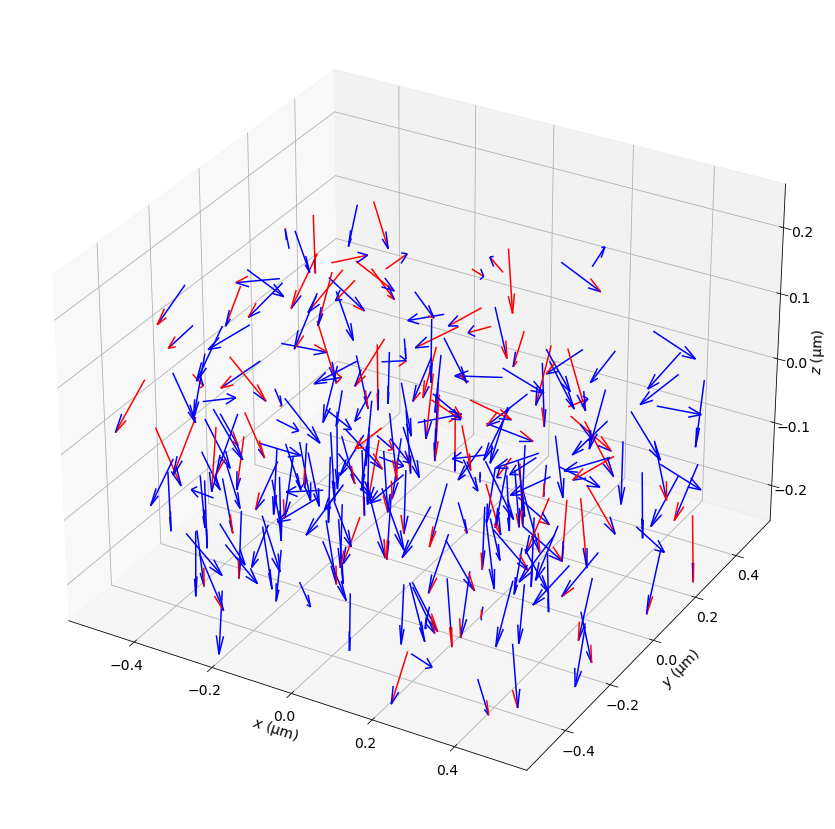

In [4]:
fig1_hand, axes1_hand = actin_network.display()

In [5]:
180 - 180 / np.pi * np.arccos(actin_network.barbed_orientation_mat[-21:, 2])

array([12.80161352, 47.30578168, 27.59348224, 65.45774362, 47.36636455,
       20.6119553 , 23.15905358, 62.79086607, 46.78456974, 66.20852938,
       62.69199112, 67.07286253, 77.32815823, 52.34261203, 26.70948544,
       82.21531809, 59.55762303, 24.69795843, 42.53517393, 52.45059902,
       81.85434857])

In [6]:
actin_network.no_barbed

250

In [7]:
np.histogram(actin_network.barbed_xyz_mat[:, 2])

(array([13, 28, 41, 39, 35, 35, 20, 22, 13,  4]),
 array([-0.24592781, -0.19585122, -0.14577464, -0.09569805, -0.04562146,
         0.00445513,  0.05453172,  0.1046083 ,  0.15468489,  0.20476148,
         0.25483807]))

In [8]:
actin_network.current_time

2.047824768089719

(array([2., 6., 6., 4., 7., 4., 5., 8., 2., 6.]),
 array([12.80161352, 19.74298397, 26.68435443, 33.62572489, 40.56709535,
        47.5084658 , 54.44983626, 61.39120672, 68.33257717, 75.27394763,
        82.21531809]),
 <BarContainer object of 10 artists>)

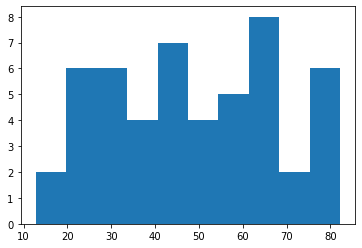

In [10]:
plt.hist(180 - 180 / np.pi * np.arccos(actin_network.barbed_orientation_mat[-50:, 2]))